# 1. [50] Missing gates

A professor was explaning an algorithm and draw a circuit on the writeboard, but after the lecture one of your classmates erased a few gates in the middle. You were late, so you came to copy the ciruit to your notebook. Now you need to restore the missing gates given:
- empirical distribution (observations), total program matrix, and the statevector.

**Requirements**:
- don't try to guess the gate by substitution. No way. You have to provide a solution.
- solve the problem "with pen and paper" - write your solution in `sympy` of just with pure $\LaTeX$.

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer
from qiskit.visualization import plot_histogram
from numpy import pi

qreg = QuantumRegister(3, 'qubits')
creg = ClassicalRegister(3, 'bits')
qc = QuantumCircuit(qreg, creg)

# set data
qc.ry(pi / 3, qreg[0])
qc.barrier()

#############################
#                           #
#      MISSING PART         #
#                           #
#############################

# entangle
qc.cx(qreg[1], qreg[2])
qc.h(qreg[1])

# disentangle
qc.h(qreg[0])
qc.cx(qreg[0], qreg[1])
qc.h(1)
qc.cx(2, 1)
qc.h([0])

qc.barrier()
qc.measure(qreg, creg)

qc.draw()

```
          ┌─────────┐  ░░░░░░░░░░┌───┐          ┌───┐       ┌─┐      
qubits_0: ┤ Ry(π/3) ├──░░░░░░░░░░┤ H ├───────■──┤ H ├───────┤M├──────
          └─────────┘  ░░░░░░░░░░└───┘┌───┐┌─┴─┐├───┤┌───┐  └╥┘┌─┐   
qubits_1: ─────────────░░░░░░░░░░──■──┤ H ├┤ X ├┤ H ├┤ X ├───╫─┤M├───
                       ░░░░░░░░░░┌─┴─┐└───┘└───┘└───┘└─┬─┘   ║ └╥┘┌─┐
qubits_2: ───────────────────────┤ X ├─────────────────■─────╫──╫─┤M├
                                 └───┘                       ║  ║ └╥┘
  bits: 3/═══════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 
```

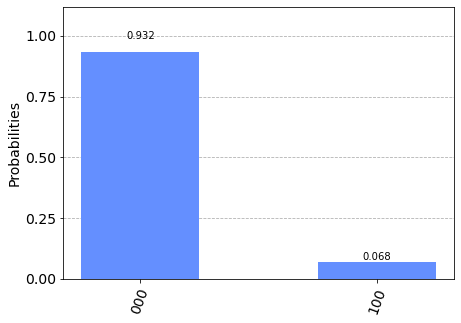

In [22]:
qpu = BasicAer.get_backend('qasm_simulator')
hist = execute(qc, qpu, shots=65535).result().get_counts()
plot_histogram(hist)

In [23]:
import numpy as np
np.set_printoptions(precision=6)
svqpu = BasicAer.get_backend('statevector_simulator')

# cool thing you may want to use when going from one type of simulator to another
qc.remove_final_measurements()
# the result is real-valued. We remain real part just for clarity.
execute(qc, svqpu).result().get_statevector().real

## NB please make sure you understand, 
# that in IBMs world the "2nd" qubit is living in the rightmost position
# which is kind of weird.

array([0.965926, 0.      , 0.      , 0.      , 0.258819, 0.      ,
       0.      , 0.      ])

In [24]:
mxqpu = BasicAer.get_backend('unitary_simulator')
np.set_printoptions(precision=3)
execute(qc, mxqpu).result().get_unitary(qc, decimals=5).real

array([[ 0.966,  0.259,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.259, -0.966,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.259, -0.966,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.966,  0.259],
       [ 0.259, -0.966,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.966,  0.259,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.966,  0.259,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.259, -0.966]])

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
Let me help you with the task )) 

If unknown transformation is called $Q$, we can rewrite the program in matrix form like:

$(Remainder)\times\left(Q\otimes I\right)\times\left( RY(\frac{\pi}{3})\otimes I\otimes I\right)=U$

1. Solve this equation for $Q\otimes I$. Then compute actual matrix using numpy. NB! Matrices are attached in reverse order compared to the gates order.
2. Look at the resulting matrix, can you find $Q$?
3. Now look at $Q$. How it acts on $\ket{00}$? Did we see this operator before? Which primitive gates it consists of?
4. Add missing gates to the program and run to obtain the same result.

In [ ]:
# your text here

In [ ]:
# your code here

# 2. [50] Invent a CRY($\frac{\pi}{2}$) gate

Assume you have only arbitrary 1-qubit gates + $CNOT$. How to construct $CRY$ gate of them?

Base your solution on [this classical paper](https://arxiv.org/abs/quant-ph/0406176), pay attention to: formula 13 (what is multiplexor) and **chapter 3.1**. It explicitly says what you should do.

**Provide both code and justification!**

HINT: $CRY(\phi)$ is a multiplexor $I\oplus RY(\phi) = RY(0)\oplus RY(\phi)$

In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer, transpile
from qiskit.visualization import plot_histogram
from numpy import pi

qreg = QuantumRegister(2, 'qubits')
creg = ClassicalRegister(2, 'bits')
qc = QuantumCircuit(qreg, creg)

qc.h(0)
qc.cry(np.pi/2, 0, 1)

display(qc.draw())

import numpy as np
np.set_printoptions(precision=5)
svqpu = BasicAer.get_backend('statevector_simulator')
execute(qc, svqpu).result().get_statevector().real

┌───┐           
qubits_0: ┤ H ├─────■─────
          └───┘┌────┴────┐
qubits_1: ─────┤ Ry(π/2) ├
               └─────────┘
  bits: 2/════════════════

array([0.70711, 0.5    , 0.     , 0.5    ])

In [6]:
qreg = QuantumRegister(2, 'qubits')
creg = ClassicalRegister(2, 'bits')
qc = QuantumCircuit(qreg, creg)

qc.h(0)

# your code and comments are here

# display(qc.draw())

import numpy as np
np.set_printoptions(precision=5)
svqpu = BasicAer.get_backend('statevector_simulator')
execute(qc, svqpu).result().get_statevector().real

array([0.70711, 0.5    , 0.     , 0.5    ])

After the homework ask the professor to show, how to solve the same problem with transpilation :)